In [1]:
import warnings
warnings.filterwarnings('ignore')
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import gsd.hoomd
from flowermd.base import Pack, Simulation
from flowermd.library import BeadSpring, LJChain
from flowermd.utils import get_target_box_number_density
import unyt as u
import hoomd

cpu = hoomd.device.CPU()

In [28]:
molecules = LJChain(lengths=100,num_mols=1)
system = Pack(molecules=molecules,density=0.01*u.Unit("nm**-3"),packing_expand_factor=7,overlap=2,edge=2)
ff = BeadSpring(
    r_cut=2.5,
    beads={ "A": dict(epsilon=1.0, sigma=1.0)},
    bonds={ "A-A": dict(r0=1.0, k=300.0)},
    angles={ "A-A-A": dict(t0=np.pi, k=10.0)},
    dihedrals={"A-A-A-A": dict(phi0=0.0, k=100, d=-1, n=1)})
gsd_path=('trajectory.gsd')
log_path=('log.txt')
system.to_gsd("init_frame.gsd")
lj_sim = Simulation(
    initial_state="init_frame.gsd",
    forcefield=ff.hoomd_forces,
    gsd_write_freq=int(1e5),
    gsd_file_name=gsd_path,
    log_file_name=log_path,
    dt=0.001,
    log_write_freq=int(1e5),
)
target_box = get_target_box_number_density(density=0.01*u.Unit("nm**-3"),n_beads=int(100))
lj_sim.run_update_volume(final_box_lengths=target_box,kT=5.0,n_steps=1e5,tau_kt=5*lj_sim.dt,period=10)
lj_sim.run_NVT(n_steps=int(1e7), kT=5.0, tau_kt=10*lj_sim.dt)
lj_sim.flush_writers()
lj_sim.save_restart_gsd("restart.gsd")

Initializing simulation state from a GSD file.
Step 100000 of 100000; TPS: 50556.83; ETA: 0.0 minutes
Step 99999 of 10000000; TPS: 46756.36; ETA: 3.5 minutes
Step 199999 of 10000000; TPS: 46835.17; ETA: 3.5 minutes
Step 299999 of 10000000; TPS: 46895.49; ETA: 3.4 minutes
Step 399999 of 10000000; TPS: 46454.21; ETA: 3.4 minutes
Step 499999 of 10000000; TPS: 46374.01; ETA: 3.4 minutes
Step 599999 of 10000000; TPS: 46360.7; ETA: 3.4 minutes
Step 699999 of 10000000; TPS: 46340.73; ETA: 3.3 minutes
Step 799999 of 10000000; TPS: 46275.45; ETA: 3.3 minutes
Step 899999 of 10000000; TPS: 46233.49; ETA: 3.3 minutes
Step 999999 of 10000000; TPS: 46036.38; ETA: 3.3 minutes
Step 1099999 of 10000000; TPS: 45996.08; ETA: 3.2 minutes
Step 1199999 of 10000000; TPS: 46051.45; ETA: 3.2 minutes
Step 1299999 of 10000000; TPS: 46125.51; ETA: 3.1 minutes
Step 1399999 of 10000000; TPS: 46126.96; ETA: 3.1 minutes
Step 1499999 of 10000000; TPS: 46131.61; ETA: 3.1 minutes
Step 1599999 of 10000000; TPS: 46159.09;

In [29]:
print(lj_sim.timestep)

10100001


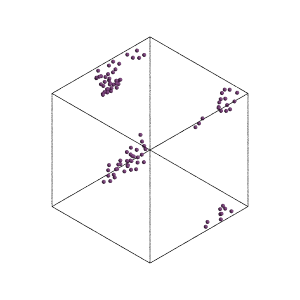

In [30]:
from cmeutils.visualize import FresnelGSD

sim_visualizer = FresnelGSD(
    gsd_file="trajectory.gsd", frame=2, view_axis=(1, 1, 1)
)
sim_visualizer.view()

In [36]:
gsd_path=('trajectory1.gsd')
log_path=('log1.txt')
ff = BeadSpring(
    r_cut=2.5,
    beads={ "A": dict(epsilon=1.0, sigma=1.0)},
    bonds={ "A-A": dict(r0=1.0, k=300.0)},
    angles={ "A-A-A": dict(t0=np.pi, k=10.0)},
    dihedrals={"A-A-A-A": dict(phi0=0.0, k=100, d=-1, n=1)})
lj_sim_3 = Simulation(
    initial_state="restart.gsd",
    forcefield=ff.hoomd_forces,
    gsd_write_freq=int(1e5),
    gsd_file_name=gsd_path,
    log_file_name=log_path,
    dt=0.001,
    log_write_freq=int(1e5),
)
lj_sim_3.run_NVT(n_steps=int(1e7), kT=5.0, tau_kt=10*lj_sim_3.dt)
lj_sim_3.flush_writers()
lj_sim_3.save_restart_gsd("restart.gsd")

Initializing simulation state from a GSD file.
Step 99999 of 10000000; TPS: 42596.32; ETA: 3.9 minutes
Step 199999 of 10000000; TPS: 44930.38; ETA: 3.6 minutes
Step 299999 of 10000000; TPS: 45593.63; ETA: 3.5 minutes
Step 399999 of 10000000; TPS: 46098.41; ETA: 3.5 minutes
Step 499999 of 10000000; TPS: 46407.85; ETA: 3.4 minutes
Step 599999 of 10000000; TPS: 46665.25; ETA: 3.4 minutes
Step 699999 of 10000000; TPS: 46713.4; ETA: 3.3 minutes
Step 799999 of 10000000; TPS: 46697.24; ETA: 3.3 minutes
Step 899999 of 10000000; TPS: 46698.29; ETA: 3.2 minutes
Step 999999 of 10000000; TPS: 46678.83; ETA: 3.2 minutes
Step 1099999 of 10000000; TPS: 46621.54; ETA: 3.2 minutes
Step 1199999 of 10000000; TPS: 46504.4; ETA: 3.2 minutes
Step 1299999 of 10000000; TPS: 46440.13; ETA: 3.1 minutes
Step 1399999 of 10000000; TPS: 46490.79; ETA: 3.1 minutes
Step 1499999 of 10000000; TPS: 46524.34; ETA: 3.0 minutes
Step 1599999 of 10000000; TPS: 46493.75; ETA: 3.0 minutes
Step 1699999 of 10000000; TPS: 46412.9

In [40]:
from cmeutils.sampling import is_equilibrated
shrink_cut = 0
log = np.genfromtxt('log1.txt', names=True)
pe = log["mdcomputeThermodynamicQuantitiespotential_energy"]
# equil: bool (True or False), t0: int (starting data point that you can sample from), neff: number of data points in equilibrated region
print(pe[shrink_cut:])
equil, t0, g, neff = is_equilibrated(data=pe[shrink_cut:], threshold_neff=100) 
if equil:
    print("True")
else:
    # If it's not equilibrated, job.doc.equilibrated stays false, and the "run-longer" operation in project.py will run next time we submit this job
    print("False")

[ 727.48708  834.95685  760.49311  931.42768  805.28198  739.72208
  842.53447  866.46243  891.76662  856.44867  893.39384  910.12994
  806.3869   796.34247  916.87258  992.37378  854.15857  890.50166
  694.50774  815.77832  770.93469  761.83423  878.11445  790.21439
  889.78855  825.43489  759.88784  875.4892   773.8543   787.80066
  891.3053   792.40433  779.47384  912.21186  893.30654 1138.96
  759.21959  688.68178  811.87708  801.37126  798.66241  810.76379
  851.67323  757.94149  728.54321  809.97761  677.94876  867.8237
  884.74994  871.43893  867.32038  829.08842  653.87137  951.5481
 1153.06     622.55822  939.93338  811.08511  874.12353  814.97686
  872.05211  850.60194  897.88662  876.42928  908.56003  809.85007
  786.21598  709.11911  781.78074  934.87801  939.56702  826.21437
  903.27135 1029.36     620.09085  914.41993  731.8364   720.76355
  770.03664  849.84074  822.11342  904.09387  912.58049  934.91835
  826.9228   838.05606  824.38168  834.77103  906.09295  887.32153
